## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [52]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [53]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston['feature_names'])
y = boston.target

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [56]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

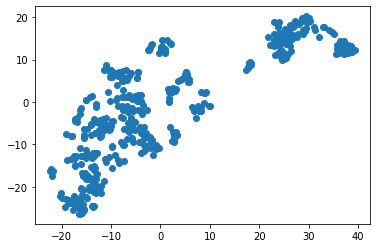

In [57]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

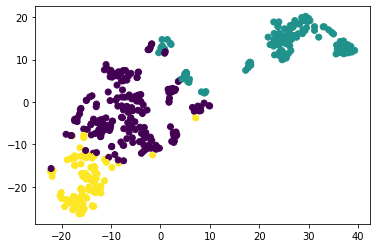

In [59]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [71]:
price, crim = [], []

for i in range(3):
    price.append(X_train['CRIM'][labels_train == i].mean())
    crim.append(y_train[labels_train == i].mean())
    
price, crim

([0.4216602094240837, 10.797028425196851, 0.07356558139534884],
 [24.958115183246072, 16.165354330708663, 27.78837209302326])

## * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [76]:
labels_test = kmeans.fit_predict(X_test_scaled)

labels_test

array([1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [78]:
price, crim = [], []

for i in range(3):
    price.append(X_test['CRIM'][labels_test == i].mean())
    crim.append(y_test[labels_test == i].mean())
    
price, crim

([9.419181842105264, 0.2244212, 0.08618571428571427],
 [16.710526315789473, 21.651999999999997, 33.871428571428574])